Increasing Trend


In [ ]:
!pip install khayyam
!pip install unidecode

     |████████████████████████████████| 46 kB 1.7 MB/s 
  Created wheel for khayyam: filename=Khayyam-3.0.17-cp37-cp37m-linux_x86_64.whl size=74598 sha256=6dffda0a11676f6fd3f7a31889a003b1b898c883dde18b6154f6630077ac26d2
  Stored in directory: /root/.cache/pip/wheels/5c/27/04/a40f5c44518210fbd57f8a2045ee50f835bcb75fe884daca06
Successfully built khayyam
     |████████████████████████████████| 235 kB 5.2 MB/s 


In [ ]:
pip install 'openpyxl==3.0.0'

     |████████████████████████████████| 172 kB 5.3 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=2fc9ed552016d66af4c6ba5edb6589d35111de030afe78cf34ef14152c422b5d
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from numpy import array

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
import tensorflow as tf

from itertools import cycle
from khayyam import *
from datetime import date, datetime
import datetime as dt
from unidecode import unidecode
# ! pip install plotly

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
khamhar = pd.read_csv('/content/drive/MyDrive/SN/Final/final__/khamhar.csv')
khamhar

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI
0,2460.0,2460.0,2520.0,2470.0,1400-1-7,خمهر,81137074,2021-03-27,NaN,2470.000000,NaN
1,2490.0,2430.0,2540.0,2460.0,1400-1-8,خمهر,53847555,2021-03-28,NaN,2464.000000,NaN
2,2420.0,2420.0,2470.0,2450.0,1400-1-10,خمهر,5140265,2021-03-30,NaN,2457.368421,NaN
3,2410.0,2410.0,2410.0,2450.0,1400-1-11,خمهر,405142,2021-03-31,NaN,2454.307692,NaN
4,2410.0,2410.0,2410.0,2450.0,1400-1-14,خمهر,191013,2021-04-03,2456.0,2452.654028,NaN
...,...,...,...,...,...,...,...,...,...,...,...
179,1758.0,1700.0,1819.0,1747.0,1400-10-27,خمهر,9205814,2022-01-17,1812.2,1781.531362,45.769566
180,1674.0,1660.0,1733.0,1665.0,1400-10-28,خمهر,12239005,2022-01-18,1767.2,1742.687575,39.706411
181,1623.0,1623.0,1725.0,1681.0,1400-10-29,خمهر,11867045,2022-01-19,1728.2,1722.125050,41.339312
182,1643.0,1597.0,1729.0,1611.0,1400-11-2,خمهر,12935409,2022-01-22,1692.4,1685.083366,36.661319


In [ ]:
khamhar_social = pd.read_excel('/content/drive/MyDrive/SN/Final/social_data/خمهر.xlsx')
khamhar_social

,date and time,view
0,۱۹:۳۳:۵۰ ۱۴۰۰/۰۱/۰۳,1187
1,۰۱:۱۴:۳۳ ۱۴۰۰/۰۱/۰۴,94
2,۱۳:۵۱:۳۳ ۱۴۰۰/۰۱/۰۶,896
3,۲۰:۰۵:۳۶ ۱۴۰۰/۰۱/۰۶,62
4,۲۱:۰۲:۵۴ ۱۴۰۰/۰۱/۰۶,299
...,...,...
6308,۱۲:۳۰:۰۹ ۱۴۰۰/۱۱/۰۳,878
6309,۱۲:۳۰:۴۲ ۱۴۰۰/۱۱/۰۳,47
6310,۱۲:۵۸:۲۷ ۱۴۰۰/۱۱/۰۳,70
6311,۱۵:۳۳:۰۵ ۱۴۰۰/۱۱/۰۳,369


In [ ]:
khamhar_social.columns = ['date and time', 'view']
khamhar_social['presian_date'] = khamhar_social['date and time'].apply(lambda x: x.split(" ")[1])
khamhar_social['gregorian_date'] = khamhar_social['presian_date'].apply(lambda x: JalaliDate(int(unidecode(x.split("/")[0])), int(unidecode(x.split("/")[1])), int(unidecode(x.split("/")[2]))).todate())
khamhar_social = khamhar_social[['gregorian_date', 'view']]
khamhar_social = khamhar_social.groupby(by='gregorian_date').mean()
khamhar_social['gregorian_date'] = khamhar_social.index
khamhar_social['gregorian_date'] = khamhar_social['gregorian_date'].astype(str)
khamhar_social['index'] = [i for i in range(len(khamhar_social))]
khamhar_social.set_index('index', inplace=True)
khamhar_social

,view,gregorian_date
index,,
0,1187.000000,2021-03-23
1,94.000000,2021-03-24
2,419.000000,2021-03-26
3,1235.840580,2021-03-27
4,704.026316,2021-03-28
...,...,...
280,1228.833333,2022-01-19
281,4942.200000,2022-01-20
282,315.444444,2022-01-21


# Merging closeprice to social indicators

In [ ]:
khamhar_df=pd.merge(khamhar,khamhar_social, on='gregorian_date', how='inner')
khamhar_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view
0,2460.0,2460.0,2520.0,2470.0,1400-1-7,خمهر,81137074,2021-03-27,NaN,2470.000000,NaN,1235.840580
1,2490.0,2430.0,2540.0,2460.0,1400-1-8,خمهر,53847555,2021-03-28,NaN,2464.000000,NaN,704.026316
2,2420.0,2420.0,2470.0,2450.0,1400-1-10,خمهر,5140265,2021-03-30,NaN,2457.368421,NaN,656.300000
3,2410.0,2410.0,2410.0,2450.0,1400-1-11,خمهر,405142,2021-03-31,NaN,2454.307692,NaN,694.600000
4,2410.0,2410.0,2410.0,2450.0,1400-1-14,خمهر,191013,2021-04-03,2456.0,2452.654028,NaN,3379.352941
...,...,...,...,...,...,...,...,...,...,...,...,...
175,1758.0,1700.0,1819.0,1747.0,1400-10-27,خمهر,9205814,2022-01-17,1812.2,1781.531362,45.769566,20.000000
176,1674.0,1660.0,1733.0,1665.0,1400-10-28,خمهر,12239005,2022-01-18,1767.2,1742.687575,39.706411,22.517857
177,1623.0,1623.0,1725.0,1681.0,1400-10-29,خمهر,11867045,2022-01-19,1728.2,1722.125050,41.339312,1228.833333
178,1643.0,1597.0,1729.0,1611.0,1400-11-2,خمهر,12935409,2022-01-22,1692.4,1685.083366,36.661319,524.425000


In [ ]:
# k = khaperes_df['view'].ewm(span=10, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = khaperes_df['view'].ewm(span=22, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# khaperes_df['macd'] = khaperes_df.index.map(macd)
# khaperes_df['macd_h'] = khaperes_df.index.map(macd_h)
# khaperes_df['macd_s'] = khaperes_df.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# khaperes_df

In [ ]:
def computeRSI (data, time_window):
    oneday = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    gain = 0 * oneday
    loss = 0 * oneday
    
    # up change is equal to the positive difference, otherwise equal to zero
    gain[oneday > 0] = oneday[ oneday>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    loss[oneday < 0] = oneday[ oneday < 0 ]
    
    # check pandas documentation for ewm
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    gain_avg   = gain.ewm(com=time_window-1 , min_periods=time_window).mean() #gainavg  is average gain over time window (period)
    loss_avg = loss.ewm(com=time_window-1 , min_periods=time_window).mean() #lossavg  is average loss over time window (period)
    
    rs = abs(gain_avg/loss_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [ ]:
khamhar_df['view'] = khamhar_df['view'].to_frame()
khamhar_df['SMA5_view'] = khamhar_df['view'].rolling(5).mean()
khamhar_df['EWMA5_view'] = khamhar_df['view'].ewm(span=5).mean()
khamhar_df['RSI_view'] = computeRSI(khamhar_df['view'], 14)

In [ ]:
khamhar_df

,Open,Low,High,Close,Date,symbol,volume,gregorian_date,SMA5,EWMA5,RSI,view,SMA5_view,EWMA5_view,RSI_view
0,2460.0,2460.0,2520.0,2470.0,1400-1-7,خمهر,81137074,2021-03-27,NaN,2470.000000,NaN,1235.840580,NaN,1235.840580,NaN
1,2490.0,2430.0,2540.0,2460.0,1400-1-8,خمهر,53847555,2021-03-28,NaN,2464.000000,NaN,704.026316,NaN,916.752021,NaN
2,2420.0,2420.0,2470.0,2450.0,1400-1-10,خمهر,5140265,2021-03-30,NaN,2457.368421,NaN,656.300000,NaN,793.380011,NaN
3,2410.0,2410.0,2410.0,2450.0,1400-1-11,خمهر,405142,2021-03-31,NaN,2454.307692,NaN,694.600000,NaN,752.348314,NaN
4,2410.0,2410.0,2410.0,2450.0,1400-1-14,خمهر,191013,2021-04-03,2456.0,2452.654028,NaN,3379.352941,1334.023967,1760.819285,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1758.0,1700.0,1819.0,1747.0,1400-10-27,خمهر,9205814,2022-01-17,1812.2,1781.531362,45.769566,20.000000,457.082449,356.467065,45.575921
176,1674.0,1660.0,1733.0,1665.0,1400-10-28,خمهر,12239005,2022-01-18,1767.2,1742.687575,39.706411,22.517857,180.837449,245.150662,45.591469
177,1623.0,1623.0,1725.0,1681.0,1400-10-29,خمهر,11867045,2022-01-19,1728.2,1722.125050,41.339312,1228.833333,362.564116,573.044886,52.580847
178,1643.0,1597.0,1729.0,1611.0,1400-11-2,خمهر,12935409,2022-01-22,1692.4,1685.083366,36.661319,524.425000,453.955238,556.838257,48.650699


# RSI

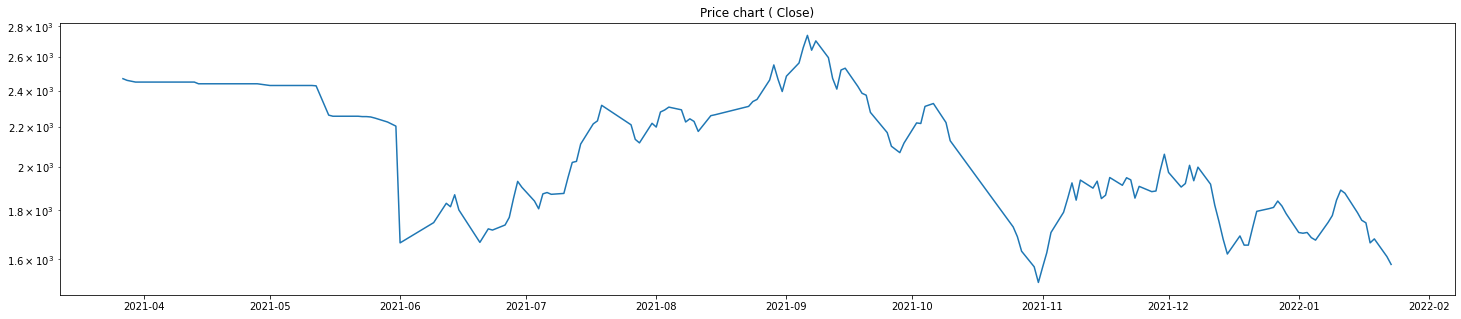

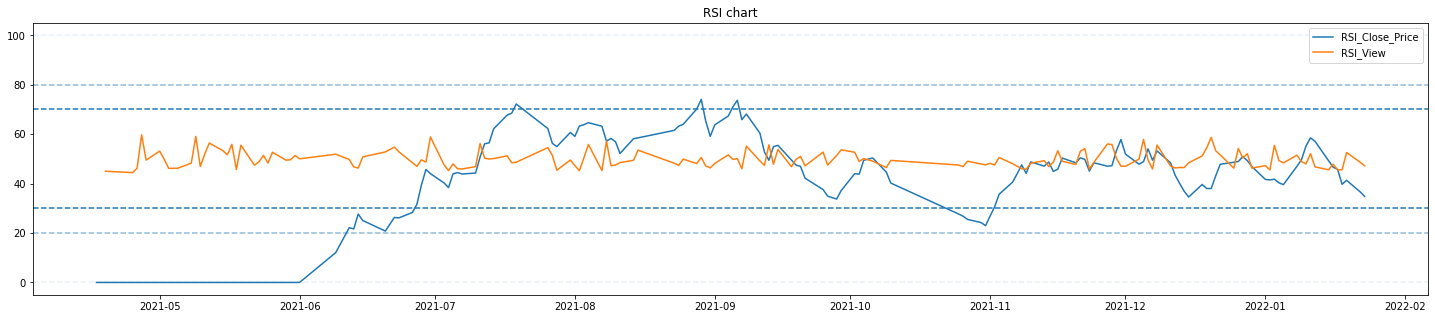

In [ ]:
plt.figure(figsize=(25,5))
khamhar_df['date'] = pd.to_datetime(khamhar_df['gregorian_date'], format = '%Y-%m-%d')
plt.plot(khamhar_df['date'], khamhar_df['Close'],label='Close_Price')
plt.title('Price chart ( Close)')
plt.yscale("log")
plt.show()
plt.figure(figsize=(25,5))
plt.title('RSI chart')
plt.plot(khamhar_df['date'], khamhar_df['RSI'],label='RSI_Close_Price')
plt.plot(khamhar_df['date'], khamhar_df['RSI_view'],label='RSI_View')
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
# Force lowercase (optional)
khamhar_df.columns = [x.lower() for x in khamhar_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khamhar_df['gregorian_date'],
        y=(khamhar_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khamhar_df['gregorian_date'],
        y=khamhar_df['rsi'],
        line=dict(color='#ff9900', width=2),
        name='RSI_Close',
        
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khamhar_df['gregorian_date'],
        y=khamhar_df['rsi_view'],
        line=dict(color='black', width=2),
        name='RSI_View',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
    # xaxis=dict(
    #     rangeslider=dict(
    #         visible=False
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

# SMA

In [ ]:
khamhar_df.columns = [x.lower() for x in khamhar_df.columns]
fig = make_subplots(rows=2, cols=1,subplot_titles=("Logarithmic Scale","Default Scale"))
# close price
fig.append_trace(
    go.Scatter(
        x=khamhar_df['gregorian_date'],
        y=(khamhar_df['close']),
        line=dict(color='#ff9900', width=1),
        name='Close',
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=khamhar_df['gregorian_date'],
        y=khamhar_df['sma5'],
        line=dict(color='#ff9900', width=2),
        name='SMA5_Close',
        legendgroup='2',

    ), row=2, col=1
)

fig.append_trace(
    go.Scatter(
        x=khamhar_df['gregorian_date'],
        y=khamhar_df['sma5_view'],
        line=dict(color='black', width=2),
        name='SMA5_view',

        legendgroup='2',
        
    ), row=2, col=1
)

layout = go.Layout(
    plot_bgcolor='#efefef',
    
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=18,
     width=1500,
     height=900
        )
    

# Update options and show plot
fig.update_yaxes( type="log", row=1, col=1)

fig.update_layout(layout)

fig.show()

In [ ]:
khamhar_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2460.0,2460.0,2520.0,2470.0,1400-1-7,خمهر,81137074,2021-03-27,NaN,2470.000000,NaN,1235.840580,NaN,1235.840580,NaN,2021-03-27
1,2490.0,2430.0,2540.0,2460.0,1400-1-8,خمهر,53847555,2021-03-28,NaN,2464.000000,NaN,704.026316,NaN,916.752021,NaN,2021-03-28
2,2420.0,2420.0,2470.0,2450.0,1400-1-10,خمهر,5140265,2021-03-30,NaN,2457.368421,NaN,656.300000,NaN,793.380011,NaN,2021-03-30
3,2410.0,2410.0,2410.0,2450.0,1400-1-11,خمهر,405142,2021-03-31,NaN,2454.307692,NaN,694.600000,NaN,752.348314,NaN,2021-03-31
4,2410.0,2410.0,2410.0,2450.0,1400-1-14,خمهر,191013,2021-04-03,2456.0,2452.654028,NaN,3379.352941,1334.023967,1760.819285,NaN,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1758.0,1700.0,1819.0,1747.0,1400-10-27,خمهر,9205814,2022-01-17,1812.2,1781.531362,45.769566,20.000000,457.082449,356.467065,45.575921,2022-01-17
176,1674.0,1660.0,1733.0,1665.0,1400-10-28,خمهر,12239005,2022-01-18,1767.2,1742.687575,39.706411,22.517857,180.837449,245.150662,45.591469,2022-01-18
177,1623.0,1623.0,1725.0,1681.0,1400-10-29,خمهر,11867045,2022-01-19,1728.2,1722.125050,41.339312,1228.833333,362.564116,573.044886,52.580847,2022-01-19
178,1643.0,1597.0,1729.0,1611.0,1400-11-2,خمهر,12935409,2022-01-22,1692.4,1685.083366,36.661319,524.425000,453.955238,556.838257,48.650699,2022-01-22


In [ ]:
khamhar_df['sma5']=khamhar_df['sma5'].fillna(value=khamhar_df['sma5'].mean())
khamhar_df['rsi']=khamhar_df['rsi'].fillna(value=khamhar_df['rsi'].mean())
khamhar_df['sma5_view']=khamhar_df['sma5_view'].fillna(value=khamhar_df['sma5_view'].mean())
khamhar_df['rsi_view']=khamhar_df['rsi_view'].fillna(value=khamhar_df['rsi_view'].mean())

In [ ]:
khamhar_df

,open,low,high,close,date,symbol,volume,gregorian_date,sma5,ewma5,rsi,view,sma5_view,ewma5_view,rsi_view,date
0,2460.0,2460.0,2520.0,2470.0,1400-1-7,خمهر,81137074,2021-03-27,2086.864773,2470.000000,38.985954,1235.840580,1303.498783,1235.840580,49.744320,2021-03-27
1,2490.0,2430.0,2540.0,2460.0,1400-1-8,خمهر,53847555,2021-03-28,2086.864773,2464.000000,38.985954,704.026316,1303.498783,916.752021,49.744320,2021-03-28
2,2420.0,2420.0,2470.0,2450.0,1400-1-10,خمهر,5140265,2021-03-30,2086.864773,2457.368421,38.985954,656.300000,1303.498783,793.380011,49.744320,2021-03-30
3,2410.0,2410.0,2410.0,2450.0,1400-1-11,خمهر,405142,2021-03-31,2086.864773,2454.307692,38.985954,694.600000,1303.498783,752.348314,49.744320,2021-03-31
4,2410.0,2410.0,2410.0,2450.0,1400-1-14,خمهر,191013,2021-04-03,2456.000000,2452.654028,38.985954,3379.352941,1334.023967,1760.819285,49.744320,2021-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1758.0,1700.0,1819.0,1747.0,1400-10-27,خمهر,9205814,2022-01-17,1812.200000,1781.531362,45.769566,20.000000,457.082449,356.467065,45.575921,2022-01-17
176,1674.0,1660.0,1733.0,1665.0,1400-10-28,خمهر,12239005,2022-01-18,1767.200000,1742.687575,39.706411,22.517857,180.837449,245.150662,45.591469,2022-01-18
177,1623.0,1623.0,1725.0,1681.0,1400-10-29,خمهر,11867045,2022-01-19,1728.200000,1722.125050,41.339312,1228.833333,362.564116,573.044886,52.580847,2022-01-19
178,1643.0,1597.0,1729.0,1611.0,1400-11-2,خمهر,12935409,2022-01-22,1692.400000,1685.083366,36.661319,524.425000,453.955238,556.838257,48.650699,2022-01-22


In [ ]:
khamhar_df.isna().sum()

open              0
low               0
high              0
close             0
date              0
symbol            0
volume            0
gregorian_date    0
sma5              0
ewma5             0
rsi               0
view              0
sma5_view         0
ewma5_view        0
rsi_view          0
date              0
dtype: int64

# Prediction closeprice

In [ ]:
khamhar_new = khamhar_df[['gregorian_date','close']]

print("Shape of dataframe:", khamhar_new.shape)

Shape of dataframe: (180, 2)


In [ ]:
del khamhar_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khamhar_new=scaler.fit_transform(np.array(khamhar_new).reshape(-1,1))


In [ ]:
def split(y, train_size=0.72):
    time_step = 15
    mid_train = int(len(y)*train_size)
    mid_test=len(y)-mid_train
    train_data=y[0:mid_train,:]
    test_data =y[mid_train:len(y),:1]
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    return train_data,test_data,X_train, y_train,X_test,y_test

def create_dataset(data, time_step=1):
    X = []
    Y=[]
    for i in range(len(data)-time_step-1):
        z = data[i:(i+time_step), 0]   
        X.append(z)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khamhar_new, train_size=0.78)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (140, 1)
test_data:  (40, 1)
X_train:  (124, 15)
y_train:  (124,)
X_test:  (24, 15)
y_test (24,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Creating model

In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


# Fitting the model to our train data

In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_close_price=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
4/4 [==============================] - 13s 611ms/step - loss: 0.2965 - val_loss: 0.0128
Epoch 2/50
4/4 [==============================] - 0s 44ms/step - loss: 0.1294 - val_loss: 0.0071
Epoch 3/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0444 - val_loss: 0.0698
Epoch 4/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0665 - val_loss: 0.0526
Epoch 5/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0385 - val_loss: 0.0200
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: 0.0404 - val_loss: 0.0125
Epoch 7/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0439 - val_loss: 0.0164
Epoch 8/50
4/4 [==============================] - 0s 49ms/step - loss: 0.0372 - val_loss: 0.0276
Epoch 9/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0336 - val_loss: 0.0376
Epoch 10/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0365 - val_loss: 0.0380
Epoch 11/50
4/4 [==========

# loss

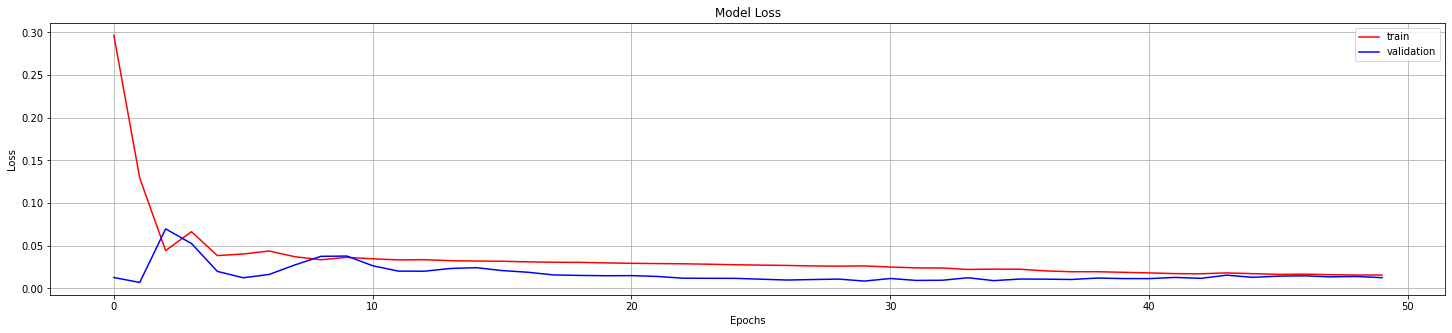

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_close_price.history['loss'],'r')
plt.plot(history_close_price.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
### Lets Do the prediction and check performance metrics
#train_predict=model.predict(X_train)
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
#print("Test data MSE: ", mean_squared_error(ytest,predictt))
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: -2.6234769130498536


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)

[[0.25900477170944214], [0.2397179901599884], [0.2298898696899414], [0.22921495139598846], [0.23826144635677338]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


# Prediction

In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khamhar_new[len(khamhar_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days of close price ','Predicted next 5 days of close price '])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of close price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khamhar stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Increasing trend 

##### Real close_price--> 3 bahman in tsetmc site =1581 , 4 bahmn = 1641   (increase > 0.5 we assaign +1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =1581 ,  our model prediction for 4 bahmn(timestamp=16) = 1831.799 (increase > 0.5 we assaign +1 (based on pdf))
##------------------------------------------------------------------------------
### So our accuracy is 100%

## Part 2 prediction the price with adding social indicators

###   Indicators

In [ ]:
khamhar_new = khamhar_df[['gregorian_date','rsi','rsi_view','sma5','sma5_view']]


print("Shape of dataframe:", khamhar_new.shape)

Shape of dataframe: (180, 5)


In [ ]:
del khamhar_new['gregorian_date']
scaler=MinMaxScaler(feature_range=(0,1))
khamhar_new=scaler.fit_transform(np.array(khamhar_new).reshape(-1,1))


In [ ]:
train_data,test_data,X_train, y_train,X_test,y_test=split(khamhar_new, train_size=0.88)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

train_data:  (633, 1)
test_data:  (87, 1)
X_train:  (617, 15)
y_train:  (617,)
X_test:  (71, 15)
y_test (71,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
tf.keras.backend.clear_session()
time_step = 15
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(10) 
random.seed(10) 
np.random.seed(10)
history_indicator=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
20/20 [==============================] - 11s 118ms/step - loss: 0.1169 - val_loss: 0.0597
Epoch 2/50
20/20 [==============================] - 1s 35ms/step - loss: 0.1027 - val_loss: 0.0716
Epoch 3/50
20/20 [==============================] - 1s 33ms/step - loss: 0.1038 - val_loss: 0.0646
Epoch 4/50
20/20 [==============================] - 1s 34ms/step - loss: 0.1027 - val_loss: 0.0614
Epoch 5/50
20/20 [==============================] - 1s 34ms/step - loss: 0.1025 - val_loss: 0.0601
Epoch 6/50
20/20 [==============================] - 1s 34ms/step - loss: 0.1020 - val_loss: 0.0634
Epoch 7/50
20/20 [==============================] - 1s 33ms/step - loss: 0.1015 - val_loss: 0.0573
Epoch 8/50
20/20 [==============================] - 1s 35ms/step - loss: 0.0959 - val_loss: 0.0506
Epoch 9/50
20/20 [==============================] - 1s 33ms/step - loss: 0.0948 - val_loss: 0.0511
Epoch 10/50
20/20 [==============================] - 1s 34ms/step - loss: 0.0858 - val_loss: 0.0549
Epoch 1

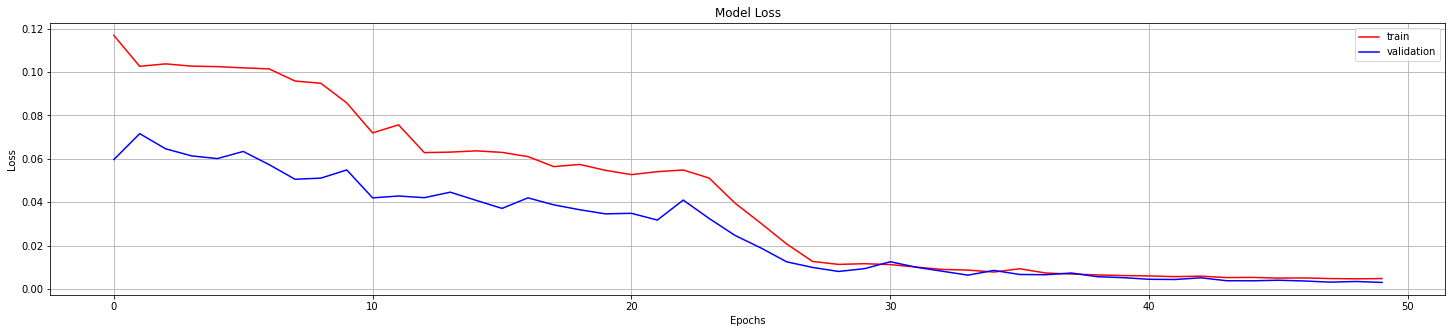

In [ ]:
# Plot the Loss Curves

plt.figure(figsize=(25,5))
plt.plot(history_indicator.history['loss'],'r')
plt.plot(history_indicator.history['val_loss'],'b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()


In [ ]:
predict=model.predict(X_test)
predictt = scaler.inverse_transform(predict)
ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
#print("Test data MSE: ", mean_squared_error(ytest,predictt))
print("Test data R2 score:", r2_score(ytest, predictt))

Test data R2 score: 0.9490368627299


In [ ]:
k=test_data[len(test_data)-time_step:].reshape(1,-1)
temp=list(k)
temp=temp[0].tolist()
next_day_predict=[]
steps=time_step
for i in range(5):
    if(len(temp)>time_step):
        k=np.array(temp[1:])
        k = k.reshape(1,-1)
        k = k.reshape((1, steps, 1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        temp=temp[1:]
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
    else:
        k = k.reshape((1, steps,1))
        predict_next_days = model.predict(k, verbose=0)
        temp.extend(predict_next_days[0].tolist())
        next_day_predict.extend(predict_next_days.tolist())
        i=i+1
               
last_days=np.arange(1,time_step+1)
pre_days=np.arange(time_step+1,time_step+10+1)

print(next_day_predict)
print("--------------------------------------------")
print('last_days are',last_days)
print("--------------------------------------------")
print('pre_days are',pre_days)


[[0.02505210041999817], [0.10852671414613724], [0.4866810739040375], [0.23214223980903625], [0.026478735730051994]]
--------------------------------------------
last_days are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
--------------------------------------------
pre_days are [16 17 18 19 20 21 22 23 24 25]


In [ ]:
value = np.empty((len(last_days)+11,1))
value[:] = np.nan
value = value.reshape(1,-1).tolist()[0]

real_last_days_value = value
predicted_days_value = value

real_last_days_value[1:time_step+1] = scaler.inverse_transform(khamhar_new[len(khamhar_new)-time_step:]).reshape(1,-1).tolist()[0]
predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(next_day_predict).reshape(-1,1)).reshape(1,-1).tolist()[0]

plot = pd.DataFrame({
    'real_last_days_value':real_last_days_value,
    'predicted_days_value':predicted_days_value
})

j=cycle(['Last 15 days with indicator of close price and view price','Predicted next 5 days with indicator of close price and view price'])
fig = px.line(plot,x=plot.index, y=[plot['real_last_days_value'],
                                                      plot['predicted_days_value']],
              labels={'value': 'Stock of indicator price','index': 'Timestamp'},color_discrete_map={
                 "real_last_days_value": "red",
                 "predicted_days_value": "red"})

fig.add_vline(x=15, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=16, line_width=3, line_dash="dash", line_color="green", fillcolor="blue")
fig.add_hrect(y0=16, y1=20, line_width=0, fillcolor="red", opacity=0.2)


fig.update_layout(title_text='Compare last 15 days vs next 5 days of khamhar stock',
                  plot_bgcolor='white', font_size=13, font_color='black',legend_title_text='Indicators')

fig.for_each_trace(lambda t:  t.update(name = next(j)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Decreasing trend

##### Real close_price--> 3 bahman in tsetmc site =1581 , 4 bahmn = 1641   (increase > 0.5 we assaign +1 (based on pdf))
##### Real close_price  --> 3 bahman (timestamp=15) in our data =408.8475 ,  our model prediction for 4 bahmn(timestamp=16) = 74.09 (decrese <-0.5 we assaign -1 (based on pdf))
##------------------------------------------------------------------------------
### So in this stock social network cant help us for Correct prediction